<a href="https://colab.research.google.com/github/JinGunseon/FinanceDataAnalysis/blob/main/%EC%8B%A4%EC%8A%B5_%EC%88%98%EC%9D%B5%EB%A5%A0_%EB%B0%8F_%EC%9D%B4%EB%8F%99_%ED%8F%89%EA%B7%A0_%EA%B3%84%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 차분(Differencing) 과 이동평균(MA) - Simple Trade Strategy

In [2]:
!pip install --upgrade finance-datareader
!pip install yfinance==0.2.18

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.57
    Uninstalling yfinance-0.2.57:
      Successfully uninstalled yfinance-0.2.57


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr

## Price difference (익일 종가 - 당일 종가)

PriceDiff = (Close Price of tomorrow - Close Price of today)

- shift(period)

In [2]:
# Facebook(META)의 주가 데이터를 2017년 8월 9일부터 불러옵니다.
fb = fdr.DataReader("META", start="20170809")    # Facebook
# Microsoft(MSFT)의 주가 데이터를 2017년 8월 9일부터 불러옵니다.
ms = fdr.DataReader("MSFT", start="20170809")  # Microsoft

ms.head(2)

,Open,High,Low,Close,Volume,Adj Close
2017-08-09,72.250000,72.510002,72.050003,72.470001,22213400,66.321594
2017-08-10,71.900002,72.190002,71.349998,71.410004,24734500,65.351540


In [3]:
ms.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
fb.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1, inplace=True)
ms.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [7]:
fb['Yesterday Close'] = fb['Close'].shift(1)
fb

,Close,Yesterday Close
2017-08-09,171.179993,NaN
2017-08-10,167.399994,171.179993
2017-08-11,168.080002,167.399994
2017-08-14,170.750000,168.080002
2017-08-15,171.000000,170.750000
...,...,...
2025-04-28,549.739990,547.270020
2025-04-29,554.440002,549.739990
2025-04-30,549.000000,554.440002
2025-05-01,572.210022,549.000000


Price Difference - manual 계산

In [9]:
fb['Price Difference']= fb['Close'] - fb['Yesterday Close']
fb['Price Diff2'] = fb['Close'].diff(1)

In [10]:
fb

,Close,Yesterday Close,Price Difference,Price Diff2
2017-08-09,171.179993,NaN,NaN,NaN
2017-08-10,167.399994,171.179993,-3.779999,-3.779999
2017-08-11,168.080002,167.399994,0.680008,0.680008
2017-08-14,170.750000,168.080002,2.669998,2.669998
2017-08-15,171.000000,170.750000,0.250000,0.250000
...,...,...,...,...
2025-04-28,549.739990,547.270020,2.469971,2.469971
2025-04-29,554.440002,549.739990,4.700012,4.700012
2025-04-30,549.000000,554.440002,-5.440002,-5.440002
2025-05-01,572.210022,549.000000,23.210022,23.210022


Price Difference - diff() method 사용

In [11]:
# Microsoft(MSFT) 주가 데이터에 '어제 종가(Yesterday Close)' 열을 추가합니다.
# 'Yesterday Close'는 'Close' 열을 기준으로 데이터를 한 행씩 아래로 이동시켜 전일 종가를 나타냅니다.
ms['Yesterday Close'] = ms['Close'].shift(1)

# Microsoft 주가 데이터에 '가격 차이(Price Difference)' 열을 추가합니다.
# 'Price Difference'는 pandas의 diff() 함수를 사용하여 'Close' 열에서 하루 전 종가와의 차이를 계산한 값입니다.
ms['Price Difference'] = ms['Close'].diff()

ms.head()

,Close,Yesterday Close,Price Difference
2017-08-09,72.470001,NaN,NaN
2017-08-10,71.410004,72.470001,-1.059998
2017-08-11,72.500000,71.410004,1.089996
2017-08-14,73.589996,72.500000,1.089996
2017-08-15,73.220001,73.589996,-0.369995


차분한 값으로부터 원래의 값 복원하기

In [12]:
ms['Price Difference'].sum()

np.float64(362.80999755859375)

In [14]:
ms['Price Difference'].cumsum() + ms['Close'][0]

<ipython-input-14-001965e3af64>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ms['Price Difference'].cumsum() + ms['Close'][0]


,Price Difference
2017-08-09,NaN
2017-08-10,71.410004
2017-08-11,72.500000
2017-08-14,73.589996
2017-08-15,73.220001
...,...
2025-04-28,391.160004
2025-04-29,394.040009
2025-04-30,395.260010
2025-05-01,425.399994


## 일일 수익률 계산

- 1 주를 계속 보유하였다고 가정.  


- 계산 방법.

- Daily Return = df/df.shift(1) - 1  
    or
- Daily Return[1:] = df[1:] / df[:-1].values - 1  
    or    
- Daily Return = df.pct_chage()

In [15]:
# Microsoft 주가 데이터에 '수익률(Return)' 열을 추가합니다.
# 'Return'은 당일 종가('Close')를 전일 종가('Yesterday Close')로 나눈 값에서 1을 뺀 값으로, 일간 수익률을 나타냅니다.
ms['Return'] = ms['Close'] / ms['Yesterday Close'] - 1

ms.head()

,Close,Yesterday Close,Price Difference,Return
2017-08-09,72.470001,NaN,NaN,NaN
2017-08-10,71.410004,72.470001,-1.059998,-0.014627
2017-08-11,72.500000,71.410004,1.089996,0.015264
2017-08-14,73.589996,72.500000,1.089996,0.015034
2017-08-15,73.220001,73.589996,-0.369995,-0.005028


In [16]:
# Microsoft 주가 데이터에서 일간 수익률을 계산하는 또 다른 방법입니다.
# 'Close'[1:]은 첫 번째 행 이후의 종가 데이터를, 'Close'[:-1]은 마지막 행 전까지의 종가 데이터를 나타냅니다.
# 이를 통해 당일 종가를 전일 종가로 나눈 후, 1을 빼서 수익률을 계산합니다.
ms['Close'][1:] / ms['Close'][:-1].values - 1

,Close
2017-08-10,-0.014627
2017-08-11,0.015264
2017-08-14,0.015034
2017-08-15,-0.005028
2017-08-16,0.005873
...,...
2025-04-28,-0.001761
2025-04-29,0.007363
2025-04-30,0.003096
2025-05-01,0.076254


In [17]:
ms['Close'].pct_change()

,Close
2017-08-09,NaN
2017-08-10,-0.014627
2017-08-11,0.015264
2017-08-14,0.015034
2017-08-15,-0.005028
...,...
2025-04-28,-0.001761
2025-04-29,0.007363
2025-04-30,0.003096
2025-05-01,0.076254


In [19]:
len(pd.date_range(ms.index[0], ms.index[-1]))

2824

In [20]:
(1+ms['Return']).cumprod()

,Return
2017-08-09,NaN
2017-08-10,0.985373
2017-08-11,1.000414
2017-08-14,1.015455
2017-08-15,1.010349
...,...
2025-04-28,5.397544
2025-04-29,5.437284
2025-04-30,5.454119
2025-05-01,5.870015


In [ ]:
# Microsoft 주가 데이터에서 첫 번째 날짜(ms.index[0])부터 마지막 날짜(ms.index[-1])까지의 날짜 범위를 생성하고,
# 해당 기간 동안의 총 일수를 출력합니다.
print(f"{len(pd.date_range(ms.index[0], ms.index[-1]))} 일간 1주를 계속 보유하였다면 누적 수익률은")

# 'Return' 열에서 각 일간 수익률에 1을 더한 값을 누적 곱(cumprod)하여 누적 수익률을 계산합니다.
# cumprod() 함수는 수익률을 계속 곱해 나가며 최종적으로 기간 동안의 누적 수익률을 계산합니다.
print((1 + ms['Return']).cumprod())

## 이동평균 - Moving average

- DataFrame.rolling()

In [ ]:
# Facebook(META) 주가 데이터에서 3일 이동평균을 계산합니다.
# 'Close' 열과 그 전날('shift(1)'), 이틀 전('shift(2)')의 'Close' 값을 더한 후 3으로 나누어 3일 이동평균을 구합니다.
(fb['Close'] + fb['Close'].shift(1) + fb['Close'].shift(2)) / 3

In [25]:
fb['Close'].rolling(3).mean()

,Close
2017-08-09,NaN
2017-08-10,NaN
2017-08-11,168.886663
2017-08-14,168.743332
2017-08-15,169.943334
...,...
2025-04-28,543.386678
2025-04-29,550.483337
2025-04-30,551.059998
2025-05-01,558.550008


### 이동평균 계산 및 이동평균선 시각화

In [30]:
fb['ma30'] = fb['Close'].rolling(30).mean()
fb['ma60'] = fb['Close'].rolling(60).mean()
fb.tail()

,Close,Yesterday Close,Price Difference,Price Diff2,ma30,ma60
2025-04-28,549.739990,547.270020,2.469971,2.469971,555.538668,614.451500
2025-04-29,554.440002,549.739990,4.700012,4.700012,553.856667,612.205834
2025-04-30,549.000000,554.440002,-5.440002,-5.440002,552.744668,609.731500
2025-05-01,572.210022,549.000000,23.210022,23.210022,552.349668,607.531834
2025-05-02,597.020020,572.210022,24.809998,24.809998,552.717002,605.734334


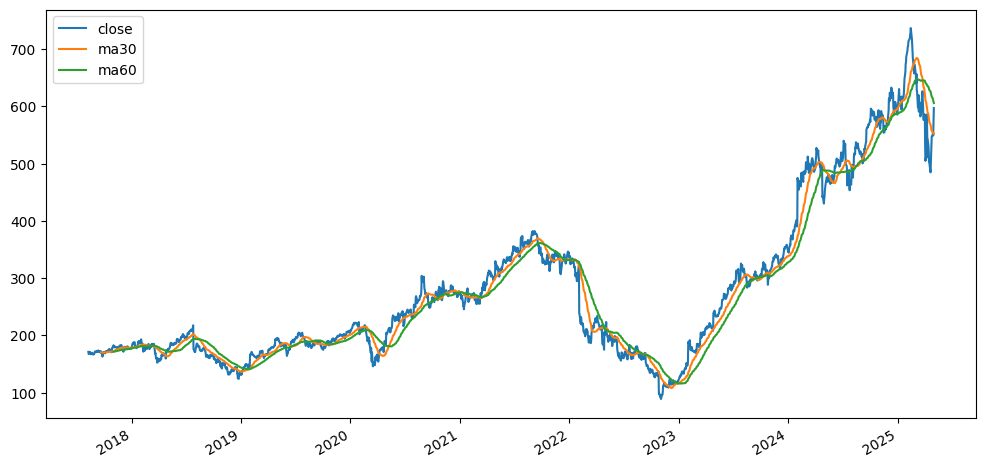

In [34]:
plt.figure(figsize=(12, 6))
fb['Close'].plot(label='close')
fb['ma30'].plot(label='ma30')
fb['ma60'].plot(label='ma60')
plt.legend()

In [35]:
fb.tail(5)

,Close,Yesterday Close,Price Difference,Price Diff2,ma30,ma60
2025-04-28,549.739990,547.270020,2.469971,2.469971,555.538668,614.451500
2025-04-29,554.440002,549.739990,4.700012,4.700012,553.856667,612.205834
2025-04-30,549.000000,554.440002,-5.440002,-5.440002,552.744668,609.731500
2025-05-01,572.210022,549.000000,23.210022,23.210022,552.349668,607.531834
2025-05-02,597.020020,572.210022,24.809998,24.809998,552.717002,605.734334


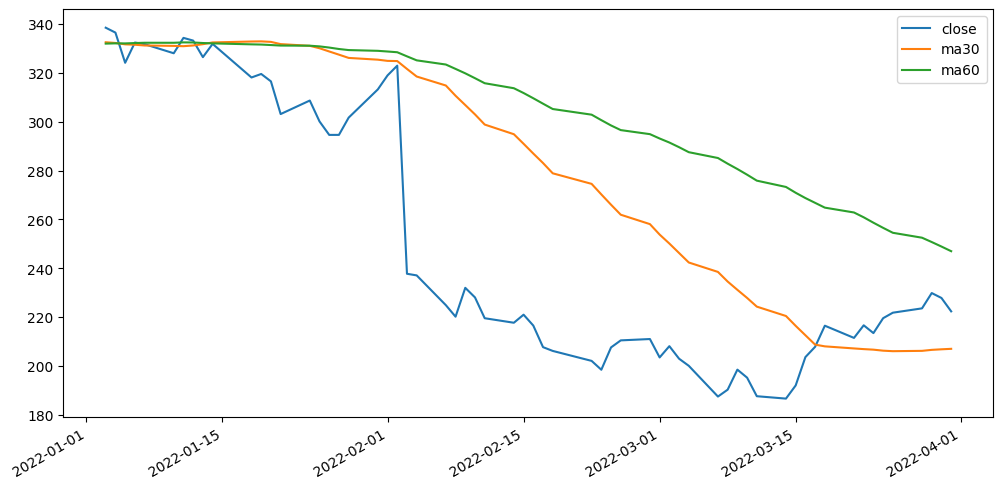

In [37]:
plt.figure(figsize=(12, 6))
fb['Close'].loc['2022-01-01':'2022-03-31'].plot(label='close')
fb['ma30'].loc['2022-01-01':'2022-03-31'].plot(label='ma30')
fb['ma60'].loc['2022-01-01':'2022-03-31'].plot(label='ma60')
plt.legend()

## EWMA (Exponentially-weighted moving average)


SMA(Simple Moving Average)에는 몇 가지 "약점"이 있습니다.
* window 가 작을수록 신호가 아닌 잡음이 증가합니다.
* 항상 window 크기만큼 지연됩니다.
* 평균화로 인해 데이터의 전체 피크 또는 계곡에 도달하지 않습니다.
* 미래의 움직임에 대해 실제로 알려주지 않습니다. 실제로는 데이터의 trend를 묘사하는 것입니다.
* 극단적인 historical value 로 인해 SMA가 크게 왜곡 될 수 있습니다.

이러한 문제를 해결하기 위해 EWMA (지수 가중 이동 평균)를 사용할 수 있습니다.

- EWMA를 사용하면 SMA의 지연 효과를 줄일 수 있으며 최근에 발생한 값에 더 많은 가중치를 적용합니다.  

- 가장 최근 값에 적용되는 가중치는 EWMA에 사용된 실제 매개 변수와 window 크기로 지정된 기간에 따라 다릅니다.

EWMA 공식은 다음과 같습니다.

$$ y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$$

$x_t$ 는 입력값, $w_i$ 는 적용된 weight (i=0 에서 t 사이로 변할 수 있음). $y_t$ 는 산출된 값입니다.

In [40]:
!pip install --upgrade yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.7/113.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 53.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.18
    Uninstalling yfinance-0.2.18:
      Successfully uninstalled yfinance-0.2.18


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr

In [7]:
df = yf.download('AAPL', start='2020-01-01', end='2020-06-30', progress=False)
df.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
df.head()

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.716072
2020-01-03,72.009125
2020-01-06,72.582893
2020-01-07,72.241539
2020-01-08,73.403625


<Axes: xlabel='Date'>

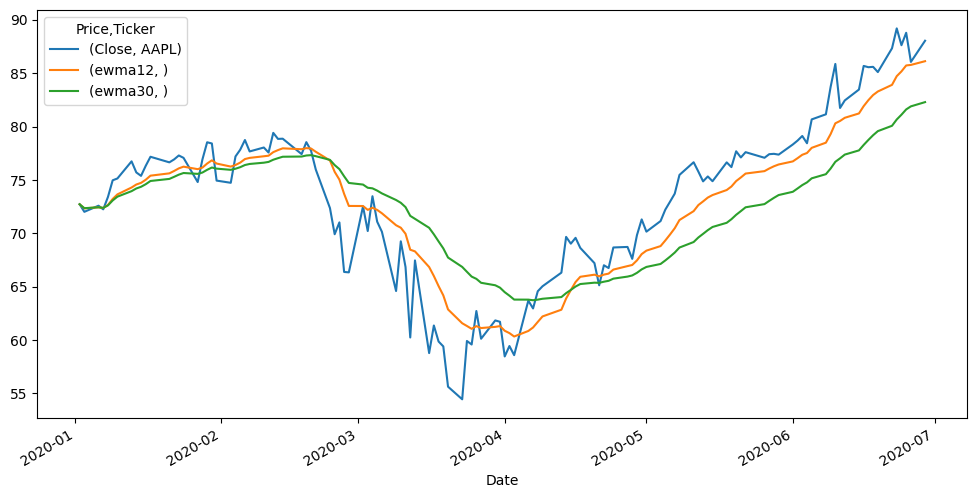

In [8]:
df['ewma12'] = df['Close'].ewm(span=12).mean()
df['ewma30'] = df['Close'].ewm(span=30).mean()
df.plot(figsize=(12, 6))